In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as sig

plt.rcParams['mathtext.fontset'],plt.rcParams['font.family'] = 'stix', 'STIXGeneral'
plt.rcParams.update({'font.size': 18})

# Import Mixer Data

In [2]:
#7.1
mixed_minus = np.load("data/mixer_data/mixed_minus.npy")
mixed_plus = np.load("data/mixer_data/mixed_plus.npy")

#7.3
mixed_dual_minus = np.load("data/mixer_data/mixed_dual_minus.npy")
mixed_dual_plus = np.load("data/mixer_data/mixed_dual_plus.npy")
mixed_dual_minus_delay = np.load("data/mixer_data/mixed_dual_minus_delay.npy")
mixed_dual_plus_delay = np.load("data/mixer_data/mixed_dual_plus_delay.npy")


In [7]:
ν_s = 62.5e6

Δt = 1 / ν_s

## 7.1 - The Double-SideBand (DSB) Mixer

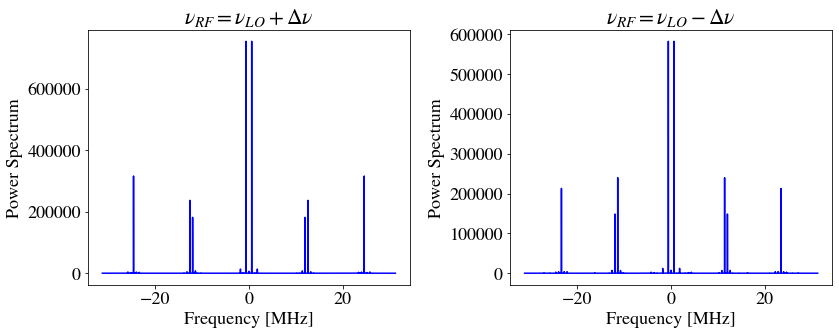

In [27]:
pk_mixed_plus = np.abs(np.fft.fft(mixed_plus[0,0,:]/ 2**16))**2 
pk_mixed_minus = np.abs(np.fft.fft(mixed_minus[0,0,:]/ 2**16))**2 

freq_mixed_plus = np.fft.fftfreq(len(mixed_plus[0,0,:]), Δt)
freq_mixed_minus = np.fft.fftfreq(len(mixed_minus[0,0,:]), Δt)

fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_plus) / 1e6, np.fft.fftshift(pk_mixed_plus), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_minus) / 1e6, np.fft.fftshift(pk_mixed_minus), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
    
fig.tight_layout()
plt.show()

In [74]:
FFT_mixed_plus = np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16))
FFT_mixed_plus[10000:] = 0
FFT_mixed_plus[:6000] = 0

# FFT_mixed_plus[7000:9000] = 0
# # FFT_mixed_plus[:6000] = 0

filtered_mixed_plus = np.fft.ifft(FFT_mixed_plus)
FFT_mixed_plus = np.fft.ifftshift(FFT_mixed_plus)
FFT_mixed_minus = np.fft.fft(mixed_plus[0,0,:]/ 2**16)

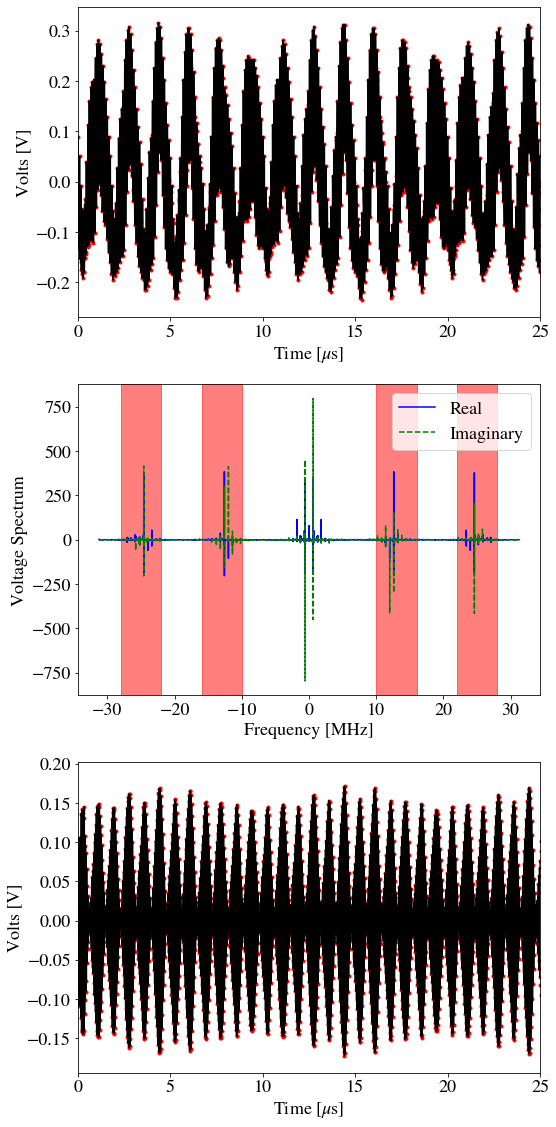

In [75]:
f, axes = plt.subplots(3,1, figsize=(8,16))

# AXES[0] ---------------------------------

axes[0].plot(np.arange(len(mixed_plus[0,0,:])) * Δt * 1e6,
         mixed_plus[0,0,:]/2**16, color="black")
axes[0].scatter(np.arange(len(mixed_plus[0,0,:])) * Δt * 1e6,
         mixed_plus[0,0,:]/2**16, color="red", marker=".")
axes[0].set_xlim(0,25)
axes[0].set_xlabel("Time [$\\mu$s]")
axes[0].set_ylabel("Volts [V]")

# AXES[1] ---------------------------------

axes[1].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
             np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16)).real,
             color="blue", label="Real")
axes[1].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
             np.fft.fftshift(np.fft.fft(mixed_plus[0,0,:]/ 2**16)).imag,
             linestyle="--", color="green", label="Imaginary")

axes[1].axvspan(-28, -22, alpha=0.5, color='red')
axes[1].axvspan(22, 28, alpha=0.5, color='red')

axes[1].axvspan(-16, -10, alpha=0.5, color='red')
axes[1].axvspan(10, 16, alpha=0.5, color='red')

axes[1].legend()
axes[1].set_xlabel("Frequency [MHz]")
axes[1].set_ylabel("Voltage Spectrum")

# AXES[2] ---------------------------------

# axes[2].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
#              np.fft.fftshift(FFT_mixed_plus).real,
#              color="blue", label="Real")
# axes[2].plot(np.fft.fftshift(freq_mixed_plus) / 1e6,
#              np.fft.fftshift(FFT_mixed_plus).imag,
#              linestyle="--", color="green", label="Imaginary")

axes[2].plot(np.arange(len(filtered_mixed_plus)) * Δt * 1e6,
         filtered_mixed_plus, color="black")
axes[2].scatter(np.arange(len(filtered_mixed_plus)) * Δt * 1e6,
         filtered_mixed_plus, color="red", marker=".")
axes[2].set_xlim(0,25)
axes[2].set_xlabel("Time [$\\mu$s]")
axes[2].set_ylabel("Volts [V]")



f.tight_layout()
plt.show()

## 7.2 - Intermodulation Products in Real Mixers

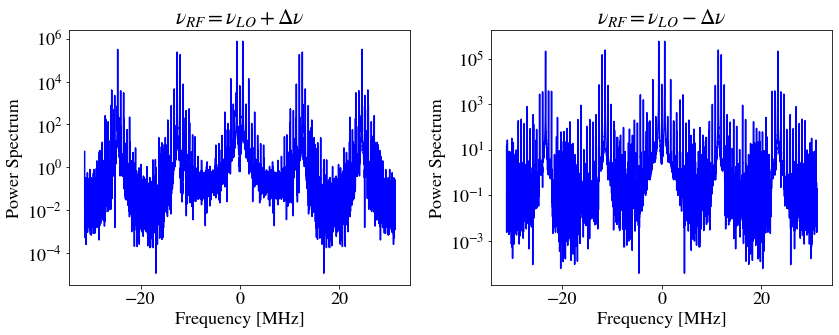

In [76]:
fig, axes = plt.subplots(1,2, figsize=(12,5))

axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_plus) / 1e6, np.fft.fftshift(pk_mixed_plus), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_minus) / 1e6, np.fft.fftshift(pk_mixed_minus), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
    ax.semilogy()
    
fig.tight_layout()
plt.show()

## 7.3 - The Single-Sideband Mixer (SSB Mixer)

In [ ]:
mixed_dual_minus = np.load("data/mixer_data/mixed_dual_minus.npy")
mixed_dual_plus = np.load("data/mixer_data/mixed_dual_plus.npy")
mixed_dual_minus_delay = np.load("data/mixer_data/mixed_dual_minus_delay.npy")
mixed_dual_plus_delay = np.load("data/mixer_data/mixed_dual_plus_delay.npy")


In [88]:
#DSB
mixed_dual_plus_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_plus_complex[:].real = mixed_dual_plus[0,0,:] / 2**16
mixed_dual_plus_complex[:].imag = mixed_dual_plus[1,0,:]/ 2**16

mixed_dual_minus_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_minus_complex[:].real = mixed_dual_minus[0,0,:] / 2**16
mixed_dual_minus_complex[:].imag = mixed_dual_minus[1,0,:] / 2**16

#SSB
mixed_dual_plus_delay_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_plus_delay_complex[:].real = mixed_dual_plus_delay[0,0,:] / 2**16
mixed_dual_plus_delay_complex[:].imag = mixed_dual_plus_delay[1,0,:] / 2**16

mixed_dual_minus_delay_complex = np.zeros(16000, dtype=np.complex128)
mixed_dual_minus_delay_complex[:].real = mixed_dual_minus_delay[0,0,:] / 2**16
mixed_dual_minus_delay_complex[:].imag = mixed_dual_minus_delay[1,0,:] / 2**16

In [90]:
pk_mixed_dual_plus = np.abs(np.fft.fft(mixed_dual_plus_complex))**2
pk_mixed_dual_minus = np.abs(np.fft.fft(mixed_dual_minus_complex))**2
freq_mixed_dual_plus = np.fft.fftfreq(len(mixed_dual_plus[0,0,:]), Δt)
freq_mixed_dual_minus = np.fft.fftfreq(len(mixed_dual_minus[0,0,:]), Δt)

pk_mixed_dual_plus_delay = np.abs(np.fft.fft(mixed_dual_plus_delay_complex))**2
pk_mixed_dual_minus_delay = np.abs(np.fft.fft(mixed_dual_minus_delay_complex))**2
freq_mixed_dual_plus_delay = np.fft.fftfreq(len(mixed_dual_plus_delay[0,0,:]), Δt)
freq_mixed_dual_minus_delay = np.fft.fftfreq(len(mixed_dual_minus_delay[0,0,:]), Δt)

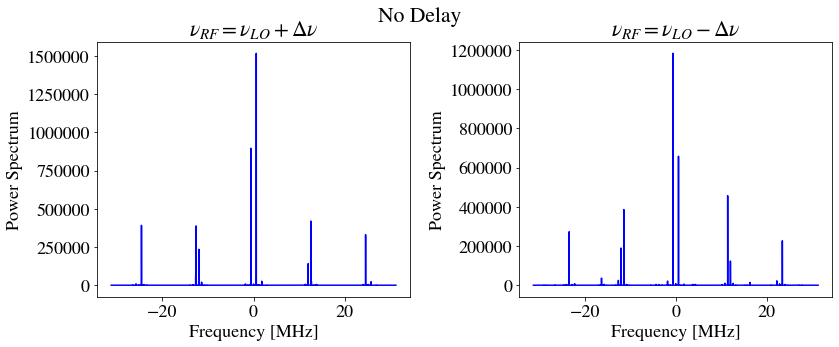

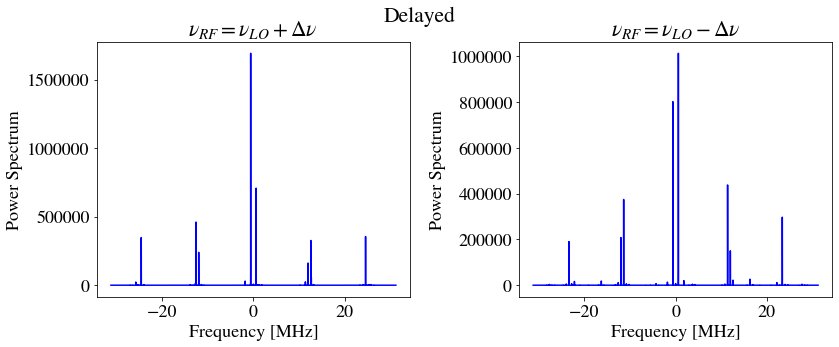

In [94]:
fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("No Delay")

axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_dual_plus) / 1e6, np.fft.fftshift(pk_mixed_dual_plus), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_dual_minus) / 1e6, np.fft.fftshift(pk_mixed_dual_minus), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
#     ax.semilogy()
    
fig.tight_layout()
plt.show()

##########################################################

fig, axes = plt.subplots(1,2, figsize=(12,5))
fig.suptitle("Delayed")
axes[0].set_title("$\\nu_{RF} = \\nu_{LO} + \\Delta \\nu$")
axes[0].plot(np.fft.fftshift(freq_mixed_dual_plus_delay) / 1e6, np.fft.fftshift(pk_mixed_dual_plus_delay), color="blue")

axes[1].set_title("$\\nu_{RF} = \\nu_{LO} - \\Delta \\nu$")
axes[1].plot(np.fft.fftshift(freq_mixed_dual_minus_delay) / 1e6, np.fft.fftshift(pk_mixed_dual_minus_delay), color="blue")

for ax in axes:
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Power Spectrum")
#     ax.semilogy()
    
fig.tight_layout()
plt.show()